In [139]:
!mkdir datasets

In [140]:
!wget -O datasets/ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train.conllu
!wget -O datasets/ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

--2023-08-27 13:14:31--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-27 13:14:31 ERROR 404: Not Found.

--2023-08-27 13:14:31--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704579 (14M) [text/plain]
Saving to: ‘datasets/ru_syntagrus-ud-dev.conllu’

datasets/ru_syntagr 100%[===================>]

In [141]:
!pip install pyconll
import pyconll

In [142]:
full_train = pyconll.load_from_file('datasets/ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('datasets/ru_syntagrus-ud-dev.conllu')

In [143]:
for token in full_test[0]:
  print(token.form, token.upos)

Алгоритм NOUN
, PUNCT
от ADP
имени NOUN
учёного NOUN
аль PART
- PUNCT
Хорезми PROPN
, PUNCT
- PUNCT
точный ADJ
набор NOUN
инструкций NOUN
, PUNCT
описывающих VERB
порядок NOUN
действий NOUN
исполнителя NOUN
для ADP
достижения NOUN
результата NOUN
решения NOUN
задачи NOUN
за ADP
конечное ADJ
время NOUN
. PUNCT


In [144]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


True

In [23]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [24]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [25]:
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger

In [ ]:
tags = [token.upos for sent in full_test for token in sent]
nltk.FreqDist(tags)

FreqDist({'NOUN': 36238, 'PUNCT': 29186, 'VERB': 17110, 'ADJ': 15103, 'ADP': 13717, 'ADV': 7783, 'PRON': 7444, 'CCONJ': 5672, 'PROPN': 5473, 'PART': 5125, ...})

In [ ]:
train_data = full_test[:int(len(full_test) * 0.9)]
test_data = full_test[int(len(full_test) * 0.9):]
test_sent = [token.lemma for token in test_data[182]]
#train_data = [(token.form, token.upos) for sent in train_data for token in sent]
#test_data = [(token.form, token.upos) for sent in test_data for token in sent]

In [ ]:
train = []
test = []
for i in range(len(train_data)):
  train.append([(token.form, token.upos) for token in train_data[i]])
for i in range(len(test_data)):
  test.append([(token.form, token.upos) for token in test_data[i]])

In [ ]:
test_sent

['и',
 'при',
 'это',
 'легкость',
 'отношение',
 'грек',
 'к',
 'деньги',
 'распространяться',
 'на',
 'все',
 '-',
 'вы',
 'угостить',
 ',',
 'вы',
 'помочь',
 'бесплатно',
 'на',
 'сервис',
 ',',
 'если',
 'поломка',
 'машина',
 'мелкий',
 ',',
 'вы',
 'оказать',
 'медицинский',
 'помощь',
 'бесплатно',
 'или',
 'за',
 'условный',
 'пять',
 'евро',
 ',',
 'если',
 'у',
 'вы',
 'не',
 'оказаться',
 'страховка',
 '…']

In [ ]:
default_tagger = nltk.DefaultTagger('NOUN')
display(default_tagger.tag(test_sent), default_tagger.accuracy(test))

[('и', 'NOUN'),
 ('при', 'NOUN'),
 ('это', 'NOUN'),
 ('легкость', 'NOUN'),
 ('отношение', 'NOUN'),
 ('грек', 'NOUN'),
 ('к', 'NOUN'),
 ('деньги', 'NOUN'),
 ('распространяться', 'NOUN'),
 ('на', 'NOUN'),
 ('все', 'NOUN'),
 ('-', 'NOUN'),
 ('вы', 'NOUN'),
 ('угостить', 'NOUN'),
 (',', 'NOUN'),
 ('вы', 'NOUN'),
 ('помочь', 'NOUN'),
 ('бесплатно', 'NOUN'),
 ('на', 'NOUN'),
 ('сервис', 'NOUN'),
 (',', 'NOUN'),
 ('если', 'NOUN'),
 ('поломка', 'NOUN'),
 ('машина', 'NOUN'),
 ('мелкий', 'NOUN'),
 (',', 'NOUN'),
 ('вы', 'NOUN'),
 ('оказать', 'NOUN'),
 ('медицинский', 'NOUN'),
 ('помощь', 'NOUN'),
 ('бесплатно', 'NOUN'),
 ('или', 'NOUN'),
 ('за', 'NOUN'),
 ('условный', 'NOUN'),
 ('пять', 'NOUN'),
 ('евро', 'NOUN'),
 (',', 'NOUN'),
 ('если', 'NOUN'),
 ('у', 'NOUN'),
 ('вы', 'NOUN'),
 ('не', 'NOUN'),
 ('оказаться', 'NOUN'),
 ('страховка', 'NOUN'),
 ('…', 'NOUN')]

0.1930071086129939

### UnigramTagger

In [ ]:
unigram_tagger = UnigramTagger(train)
display(unigram_tagger.tag(test_sent), unigram_tagger.accuracy(test))

[('и', 'CCONJ'),
 ('при', 'ADP'),
 ('это', 'PRON'),
 ('легкость', 'NOUN'),
 ('отношение', 'NOUN'),
 ('грек', None),
 ('к', 'ADP'),
 ('деньги', 'NOUN'),
 ('распространяться', 'VERB'),
 ('на', 'ADP'),
 ('все', 'DET'),
 ('-', 'PUNCT'),
 ('вы', 'PRON'),
 ('угостить', None),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('помочь', 'VERB'),
 ('бесплатно', 'ADV'),
 ('на', 'ADP'),
 ('сервис', 'NOUN'),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('поломка', None),
 ('машина', 'NOUN'),
 ('мелкий', 'ADJ'),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('оказать', 'VERB'),
 ('медицинский', None),
 ('помощь', 'NOUN'),
 ('бесплатно', 'ADV'),
 ('или', 'CCONJ'),
 ('за', 'ADP'),
 ('условный', None),
 ('пять', 'NUM'),
 ('евро', None),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('у', 'ADP'),
 ('вы', 'PRON'),
 ('не', 'PART'),
 ('оказаться', 'VERB'),
 ('страховка', 'NOUN'),
 ('…', 'PUNCT')]

0.7607869069267648

### BigramTagger

In [ ]:
bigram_tagger = BigramTagger(train, backoff=unigram_tagger)
display(bigram_tagger.tag(test_sent), bigram_tagger.accuracy(test))

[('и', 'CCONJ'),
 ('при', 'ADP'),
 ('это', 'DET'),
 ('легкость', 'NOUN'),
 ('отношение', 'NOUN'),
 ('грек', None),
 ('к', 'ADP'),
 ('деньги', 'NOUN'),
 ('распространяться', 'VERB'),
 ('на', 'ADP'),
 ('все', 'DET'),
 ('-', 'PUNCT'),
 ('вы', 'PRON'),
 ('угостить', None),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('помочь', 'VERB'),
 ('бесплатно', 'ADV'),
 ('на', 'ADP'),
 ('сервис', 'NOUN'),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('поломка', None),
 ('машина', 'NOUN'),
 ('мелкий', 'ADJ'),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('оказать', 'VERB'),
 ('медицинский', None),
 ('помощь', 'NOUN'),
 ('бесплатно', 'ADV'),
 ('или', 'CCONJ'),
 ('за', 'ADP'),
 ('условный', None),
 ('пять', 'NUM'),
 ('евро', None),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('у', 'ADP'),
 ('вы', 'PRON'),
 ('не', 'PART'),
 ('оказаться', 'VERB'),
 ('страховка', 'NOUN'),
 ('…', 'PUNCT')]

0.7668209621425028

### TrigramTagger

In [ ]:
trigram_tagger = TrigramTagger(train, backoff=bigram_tagger)
display(trigram_tagger.tag(test_sent), trigram_tagger.accuracy(test))

[('и', 'CCONJ'),
 ('при', 'ADP'),
 ('это', 'DET'),
 ('легкость', 'NOUN'),
 ('отношение', 'NOUN'),
 ('грек', None),
 ('к', 'ADP'),
 ('деньги', 'NOUN'),
 ('распространяться', 'VERB'),
 ('на', 'ADP'),
 ('все', 'DET'),
 ('-', 'PUNCT'),
 ('вы', 'PRON'),
 ('угостить', None),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('помочь', 'VERB'),
 ('бесплатно', 'ADV'),
 ('на', 'ADP'),
 ('сервис', 'NOUN'),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('поломка', None),
 ('машина', 'NOUN'),
 ('мелкий', 'ADJ'),
 (',', 'PUNCT'),
 ('вы', 'PRON'),
 ('оказать', 'VERB'),
 ('медицинский', None),
 ('помощь', 'NOUN'),
 ('бесплатно', 'ADV'),
 ('или', 'CCONJ'),
 ('за', 'ADP'),
 ('условный', None),
 ('пять', 'NUM'),
 ('евро', None),
 (',', 'PUNCT'),
 ('если', 'SCONJ'),
 ('у', 'ADP'),
 ('вы', 'PRON'),
 ('не', 'PART'),
 ('оказаться', 'VERB'),
 ('страховка', 'NOUN'),
 ('…', 'PUNCT')]

0.7673995701768888

### Комбинация

In [ ]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NOUN')
tag = backoff_tagger(train,
                     [UnigramTagger, BigramTagger, TrigramTagger],
                     backoff = backoff)

tag.accuracy(test)

0.8368325343031906

In [ ]:
backoff = trigram_tagger
tag = backoff_tagger(train,
                     [UnigramTagger, BigramTagger, TrigramTagger],
                     backoff = backoff)

tag.accuracy(test)

0.7673995701768888

In [ ]:
backoff = DefaultTagger('NOUN')
tag = backoff_tagger(train,
                     [BigramTagger, TrigramTagger],
                     backoff = backoff)

tag.accuracy(test)

0.7608695652173914

In [ ]:
backoff = trigram_tagger
tag = backoff_tagger(train,
                     [BigramTagger, TrigramTagger],
                     backoff = backoff)

tag.accuracy(test)

0.7673995701768888

Вариант с тремя теггерами и backoff от дефолта самый интересный

##NN

Одной из популярных архитектур для POS теггирования является RNN, в частности вариант с длинной краткосрочной памятью (LSTM). RNN хорошо подходят для задач последовательной обработки данных, таких как POS-tagging, поскольку они могут собирать контекстную информацию из предыдущих слов в предложении. LSTM, в частности, решают проблему исчезновения градиента, часто возникающую при обучении глубоких нейронных сетей, за счет использования ячеек памяти для сохранения информации в длинных последовательностях. Это позволяет им эффективно моделировать зависимости между словами и соответствующими им POS-тегами.

Другой часто используемой архитектурой является трансформер, которому уделяется значительное внимание в задачах обработки естественного языка. Трансформеры основаны на механизмах self-attention, которые позволяют им улавливать глобальные зависимости между словами в предложении. Это делает их особенно эффективными для моделирования долгосрочных зависимостей, что может иметь решающее значение для точной маркировки POS. Было показано, что архитектура трансформера обеспечивает высочайшую производительность в различных задачах NLP, включая маркировку POS.

Кроме того, двунаправленные сети LSTM (BiLSTM) также доказали свою эффективность для маркировки POS. BiLSTM обрабатывают входные последовательности как в прямом, так и в обратном направлении, позволяя им собирать информацию как из прошлого, так и из будущего контекста. Рассматривая оба направления, BiLSTM может лучше моделировать зависимости между словами и соответствующими им POS-тегами.

В последние годы предпринимались попытки объединить различные архитектуры для дальнейшего повышения производительности теггирования POS. Например, исследователи предложили гибридные модели, сочетающие RNN с трансформерами или другими типами нейронных сетей. Эти гибридные модели направлены на использование сильных сторон различных архитектур для достижения большей точности и обобщения.

1. Jurafsky, D., & Martin, J. H. (2019). Speech and Language Processing (3rd ed.). Pearson.
2. Huang, Z., Xu, W., & Yu, K. (2015). Bidirectional LSTM-CRF Models for Sequence Tagging. arXiv preprint arXiv:1508.01991.
3. Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. In Advances in Neural Information Processing Systems (pp. 5998-6008).

In [133]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from gensim.models import KeyedVectors,  Word2Vec

from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [134]:
from tqdm.notebook import tqdm

In [135]:
import re

In [136]:
import pandas as pd

In [137]:
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer

# Prepairing data

In [145]:
X = []
Y = []
for i in range(len(full_test)):
  X.append([token.form for token in full_test[i]])
  Y.append([token.upos for token in full_test[i]])

In [148]:
index_list_to_remove = []
for i in range(len(X)):
  for j in range(len(X[i])):
    try:
      if X[i][j] == None:
        index_list_to_remove.append((i, j))
        del X[i][j]
        del Y[i][j]
      elif Y[i][j] == None:
        index_list_to_remove.append((i, j))
        del X[i][j]
        del Y[i][j]
    except IndexError:
      print('.', end=' ')

In [149]:
len(index_list_to_remove)

0

In [150]:
data = pd.DataFrame()

In [151]:
data['x'] = X

In [152]:
data.head(2)

,x
0,"[Алгоритм, ,, от, имени, учёного, аль, -, Хоре..."
1,"[В, старой, трактовке, вместо, слова, "", поряд..."


In [153]:
morph = MorphAnalyzer()

In [154]:
def preprocess_text(text):
  text = ' '.join([i for i in text])
  text = text.lower()
  text = [morph.parse(w)[0].normal_form for w in text.split()]
  return text

In [155]:
len(X), len(Y)

(8906, 8906)

In [156]:
X[0], Y[0]

(['Алгоритм',
  ',',
  'от',
  'имени',
  'учёного',
  'аль',
  '-',
  'Хорезми',
  ',',
  '-',
  'точный',
  'набор',
  'инструкций',
  ',',
  'описывающих',
  'порядок',
  'действий',
  'исполнителя',
  'для',
  'достижения',
  'результата',
  'решения',
  'задачи',
  'за',
  'конечное',
  'время',
  '.'],
 ['NOUN',
  'PUNCT',
  'ADP',
  'NOUN',
  'NOUN',
  'PART',
  'PUNCT',
  'PROPN',
  'PUNCT',
  'PUNCT',
  'ADJ',
  'NOUN',
  'NOUN',
  'PUNCT',
  'VERB',
  'NOUN',
  'NOUN',
  'NOUN',
  'ADP',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'ADP',
  'ADJ',
  'NOUN',
  'PUNCT'])

In [157]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))

In [ ]:
print(f"Total number of tagged sentences: {len(X)}")
print(f"Vocabulary size: {num_words}")
print(f"Total number of tags: {num_tags}")

In [159]:
# encode X
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)
X_encoded = word_tokenizer.texts_to_sequences(X)

In [160]:
# encode Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [161]:
print(X_encoded[0], Y_encoded[0], sep='\n')

[205, 1, 29, 634, 1920, 1284, 6, 1646, 1, 6, 11999, 2769, 2770, 1, 12000, 1285, 723, 4708, 24, 775, 2771, 267, 529, 30, 4709, 50, 2]
[1, 2, 5, 1, 1, 10, 2, 9, 2, 2, 4, 1, 1, 2, 3, 1, 1, 1, 5, 1, 1, 1, 1, 5, 4, 1, 2]


In [162]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print(sum(different_length))

0


In [163]:
lengths = [len(seq) for seq in X_encoded]
print(f"Length of longest sentence: {max(lengths)}")

Length of longest sentence: 139


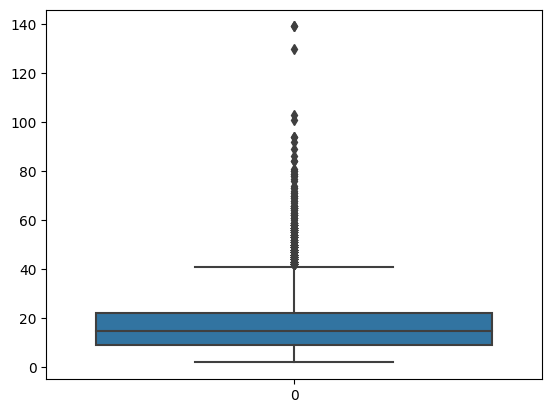

In [164]:
sns.boxplot(lengths)
plt.show()

In [165]:
MAX_SEQ_LENGTH = 100

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [166]:
print(X_padded, Y_padded, sep='\n\n')

[[   0    0    0 ... 4709   50    2]
 [   0    0    0 ... 1285    5    2]
 [   0    0    0 ...   37  141    2]
 ...
 [   0    0    0 ...    0 1717    2]
 [   0    0    0 ...  309 1251    2]
 [   0    0    0 ... 1390 5950    2]]

[[ 0  0  0 ...  4  1  2]
 [ 0  0  0 ...  1  2  2]
 [ 0  0  0 ... 11  1  2]
 ...
 [ 0  0  0 ...  0 11  2]
 [ 0  0  0 ...  6  6  2]
 [ 0  0  0 ...  4  1  2]]


In [167]:
X, Y = X_padded, Y_padded

In [168]:
sentences = []

for line in tqdm(data['x']):
    spls = preprocess_text(line)
    sentences.append(spls)

  0%|          | 0/8906 [00:00<?, ?it/s]

In [169]:
window = 5
min_count = 7
vector_size = 300
word2vec = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count)

In [170]:
word2vec.build_vocab(sentences)

In [171]:
word2vec.train(sentences, total_examples=word2vec.corpus_count, epochs=30, report_delay=1)

(2556038, 4599750)

In [172]:
# assign word vectors from word2vec model

EMBEDDING_SIZE  = 300
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

word2id = word_tokenizer.word_index

for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec.wv[word]
    except KeyError:
        pass

In [173]:
embedding_weights.shape

(34360, 300)

In [174]:
embedding_weights[word_tokenizer.word_index['алгоритм']]

array([ 1.03436756,  0.37171066,  0.15339909,  0.2375654 ,  0.15476757,
       -0.86068755,  0.70768738, -0.95884138,  0.08328022,  0.19258545,
        0.53021669, -0.20513198, -0.04454196,  1.50531805, -0.32673478,
       -0.7657271 ,  0.63932031,  0.58101863, -1.16496885, -0.69353652,
        0.57293701, -0.25266564,  0.45661533,  0.48008212,  0.63848525,
       -1.26506519,  0.50937587, -0.26442245, -0.87172258, -0.15354927,
       -0.03671407, -0.45685127,  0.55952501,  0.2492447 ,  0.36377788,
       -0.22288376,  0.75662977, -0.16240969, -0.10000405, -0.60566646,
       -0.1944245 , -0.45577168, -0.40926272,  0.28650525, -0.13549769,
        0.59614474, -0.53996974,  0.5851112 ,  0.79004502,  0.4388797 ,
       -0.00868404,  0.4183619 ,  0.02399239,  0.15371941,  0.09085071,
        0.06023124,  0.16490141, -0.75955755,  0.51792723, -0.16161953,
        0.09634479, -0.15164307, -0.3942802 , -0.01887666, -0.08231103,
        0.3968339 ,  0.28006849,  0.18356867, -0.38447478, -0.08

In [175]:
Y = to_categorical(Y)
Y.shape

(8906, 100, 18)

Train-test split

In [176]:
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)

In [177]:
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [178]:
for i in [X_train, Y_train, X_test, Y_test, X_validation, Y_validation]:
  print(i.shape)

(6434, 100)
(6434, 100, 18)
(1336, 100)
(1336, 100, 18)
(1136, 100)
(1136, 100, 18)


# Models

### RNN

In [180]:
NUM_CLASSES = Y.shape[2]

In [181]:
rnn_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, trainable = False),
    SimpleRNN(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

In [183]:
rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics = ['acc'])

In [185]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDistr  (None, 100, 18)          1170      
 ibuted)                                                         
                                                                 
Total params: 10,332,530
Trainable params: 24,530
Non-trainable params: 10,308,000
_________________________________________________________________


In [186]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 9s 135ms/step - loss: 1.0191 - acc: 0.7840 - val_loss: 0.5880 - val_acc: 0.8511
Epoch 2/10
51/51 [==============================] - 7s 134ms/step - loss: 0.5122 - acc: 0.8714 - val_loss: 0.4767 - val_acc: 0.8834
Epoch 3/10
51/51 [==============================] - 5s 101ms/step - loss: 0.4471 - acc: 0.8879 - val_loss: 0.4333 - val_acc: 0.8870
Epoch 4/10
51/51 [==============================] - 8s 153ms/step - loss: 0.4309 - acc: 0.8886 - val_loss: 0.4108 - val_acc: 0.8898
Epoch 5/10
51/51 [==============================] - 6s 123ms/step - loss: 0.3912 - acc: 0.8923 - val_loss: 0.3862 - val_acc: 0.8910
Epoch 6/10
51/51 [==============================] - 6s 110ms/step - loss: 0.3686 - acc: 0.8936 - val_loss: 0.3652 - val_acc: 0.8924
Epoch 7/10
51/51 [==============================] - 9s 167ms/step - loss: 0.3490 - acc: 0.8962 - val_loss: 0.3741 - val_acc: 0.8945
Epoch 8/10
51/51 [==============================] - 5s 102ms/step - loss: 0.

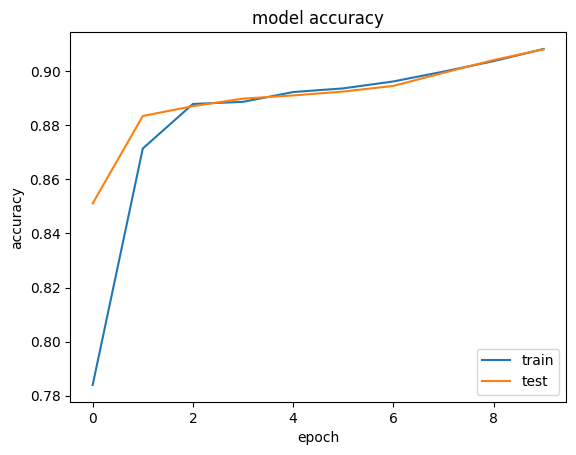

In [187]:
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

неплохо идет, можно еще эпох добавить

Та же RNN, но с изменяемыми эмбедингами

In [188]:
rnn_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, trainable = True),
    SimpleRNN(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

In [189]:
rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics = ['acc'])

In [190]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 64)           23360     
                                                                 
 time_distributed_1 (TimeDis  (None, 100, 18)          1170      
 tributed)                                                       
                                                                 
Total params: 10,332,530
Trainable params: 10,332,530
Non-trainable params: 0
_________________________________________________________________


In [191]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 34s 652ms/step - loss: 0.8769 - acc: 0.7951 - val_loss: 0.4952 - val_acc: 0.8825
Epoch 2/10
51/51 [==============================] - 24s 474ms/step - loss: 0.3740 - acc: 0.9119 - val_loss: 0.2919 - val_acc: 0.9209
Epoch 3/10
51/51 [==============================] - 24s 476ms/step - loss: 0.2252 - acc: 0.9406 - val_loss: 0.1973 - val_acc: 0.9490
Epoch 4/10
51/51 [==============================] - 25s 481ms/step - loss: 0.1438 - acc: 0.9659 - val_loss: 0.1399 - val_acc: 0.9642
Epoch 5/10
51/51 [==============================] - 22s 439ms/step - loss: 0.0913 - acc: 0.9819 - val_loss: 0.1064 - val_acc: 0.9713
Epoch 6/10
51/51 [==============================] - 24s 472ms/step - loss: 0.0588 - acc: 0.9893 - val_loss: 0.0877 - val_acc: 0.9751
Epoch 7/10
51/51 [==============================] - 26s 507ms/step - loss: 0.0394 - acc: 0.9931 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 8/10
51/51 [==============================] - 23s 462ms/step - 

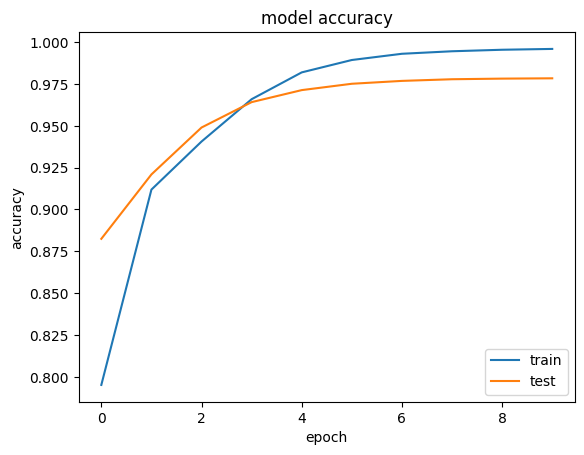

In [192]:
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

В 20 раз медленнее учится, зато точность 0.98. На трейне точность 0.99, разница между трейном и тестом не драматичная, предлагаю не считать это переобучением.

Та же RNN, но с весами эмбедингов от word2vec

In [193]:
rnn_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    SimpleRNN(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics = ['acc'])

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100, 64)           23360     
                                                                 
 time_distributed_2 (TimeDis  (None, 100, 18)          1170      
 tributed)                                                       
                                                                 
Total params: 10,332,530
Trainable params: 10,332,530
Non-trainable params: 0
_________________________________________________________________


In [194]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 29s 510ms/step - loss: 0.8997 - acc: 0.8837 - val_loss: 0.3538 - val_acc: 0.9240
Epoch 2/10
51/51 [==============================] - 25s 483ms/step - loss: 0.2801 - acc: 0.9349 - val_loss: 0.2376 - val_acc: 0.9398
Epoch 3/10
51/51 [==============================] - 26s 501ms/step - loss: 0.1911 - acc: 0.9493 - val_loss: 0.1733 - val_acc: 0.9528
Epoch 4/10
51/51 [==============================] - 23s 443ms/step - loss: 0.1273 - acc: 0.9683 - val_loss: 0.1272 - val_acc: 0.9662
Epoch 5/10
51/51 [==============================] - 25s 490ms/step - loss: 0.0807 - acc: 0.9832 - val_loss: 0.0991 - val_acc: 0.9727
Epoch 6/10
51/51 [==============================] - 24s 463ms/step - loss: 0.0513 - acc: 0.9903 - val_loss: 0.0837 - val_acc: 0.9760
Epoch 7/10
51/51 [==============================] - 26s 516ms/step - loss: 0.0345 - acc: 0.9937 - val_loss: 0.0754 - val_acc: 0.9774
Epoch 8/10
51/51 [==============================] - 31s 614ms/step - 

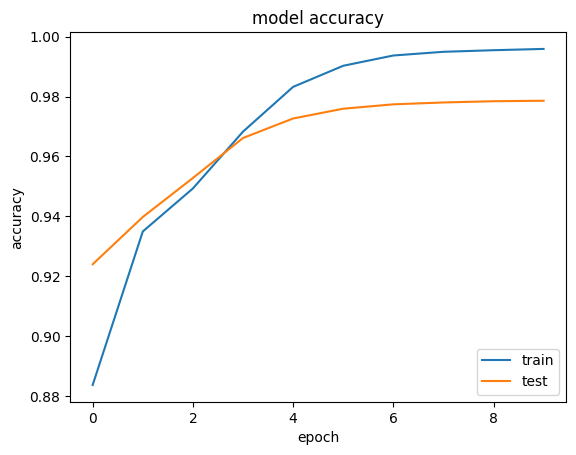

In [195]:
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

LSTM

Буду использовать веса от word2vec, эмбединги будут обучаться

In [196]:
lstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

lstm_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics = ['acc'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 lstm (LSTM)                 (None, 100, 64)           93440     
                                                                 
 time_distributed_3 (TimeDis  (None, 100, 18)          1170      
 tributed)                                                       
                                                                 
Total params: 10,402,610
Trainable params: 10,402,610
Non-trainable params: 0
_________________________________________________________________


In [197]:
lstm_training = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 49s 887ms/step - loss: 1.1442 - acc: 0.8592 - val_loss: 0.4523 - val_acc: 0.8856
Epoch 2/10
51/51 [==============================] - 56s 1s/step - loss: 0.3642 - acc: 0.9104 - val_loss: 0.3081 - val_acc: 0.9188
Epoch 3/10
51/51 [==============================] - 44s 869ms/step - loss: 0.2649 - acc: 0.9283 - val_loss: 0.2397 - val_acc: 0.9353
Epoch 4/10
51/51 [==============================] - 44s 874ms/step - loss: 0.2103 - acc: 0.9412 - val_loss: 0.1976 - val_acc: 0.9435
Epoch 5/10
51/51 [==============================] - 44s 850ms/step - loss: 0.1669 - acc: 0.9511 - val_loss: 0.1585 - val_acc: 0.9525
Epoch 6/10
51/51 [==============================] - 38s 746ms/step - loss: 0.1270 - acc: 0.9627 - val_loss: 0.1264 - val_acc: 0.9636
Epoch 7/10
51/51 [==============================] - 35s 690ms/step - loss: 0.0905 - acc: 0.9796 - val_loss: 0.1011 - val_acc: 0.9708
Epoch 8/10
51/51 [==============================] - 38s 748ms/step - los

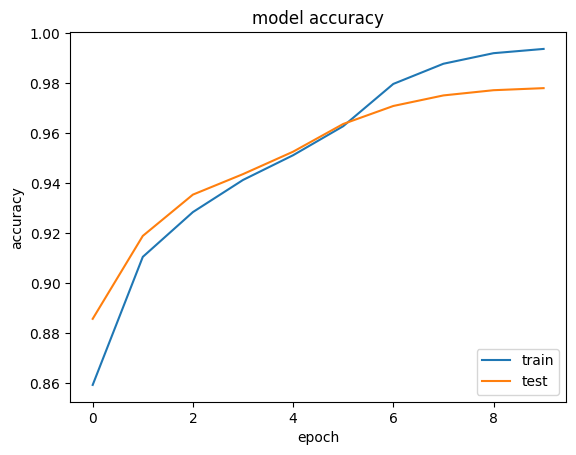

In [198]:
plt.plot(lstm_training.history['acc'])
plt.plot(lstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

GRU

In [199]:
gru_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    GRU(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

gru_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 gru (GRU)                   (None, 100, 64)           70272     
                                                                 
 time_distributed_4 (TimeDis  (None, 100, 18)          1170      
 tributed)                                                       
                                                                 
Total params: 10,379,442
Trainable params: 10,379,442
Non-trainable params: 0
_________________________________________________________________


In [200]:
gru_training = gru_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 40s 714ms/step - loss: 1.0933 - acc: 0.8797 - val_loss: 0.3542 - val_acc: 0.9052
Epoch 2/10
51/51 [==============================] - 38s 753ms/step - loss: 0.2795 - acc: 0.9298 - val_loss: 0.2364 - val_acc: 0.9373
Epoch 3/10
51/51 [==============================] - 38s 747ms/step - loss: 0.1946 - acc: 0.9454 - val_loss: 0.1768 - val_acc: 0.9483
Epoch 4/10
51/51 [==============================] - 38s 745ms/step - loss: 0.1362 - acc: 0.9612 - val_loss: 0.1305 - val_acc: 0.9634
Epoch 5/10
51/51 [==============================] - 38s 746ms/step - loss: 0.0875 - acc: 0.9801 - val_loss: 0.0991 - val_acc: 0.9714
Epoch 6/10
51/51 [==============================] - 39s 759ms/step - loss: 0.0544 - acc: 0.9889 - val_loss: 0.0811 - val_acc: 0.9756
Epoch 7/10
51/51 [==============================] - 46s 913ms/step - loss: 0.0355 - acc: 0.9929 - val_loss: 0.0723 - val_acc: 0.9769
Epoch 8/10
51/51 [==============================] - 41s 802ms/step - 

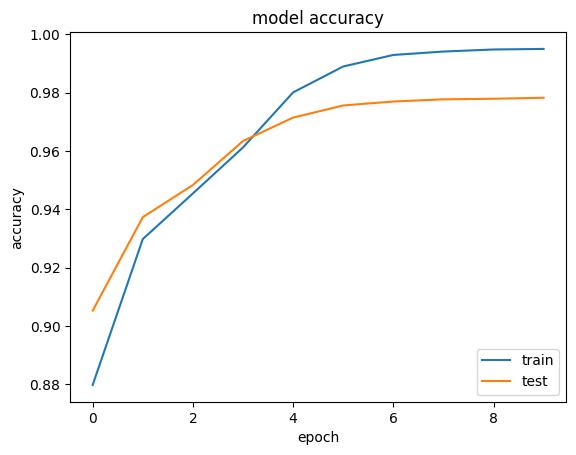

In [201]:
plt.plot(gru_training.history['acc'])
plt.plot(gru_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

BidirectionalLSTM

In [202]:
blstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    Bidirectional(LSTM(64, return_sequences=True)),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

blstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

blstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 300)          10308000  
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         186880    
 l)                                                              
                                                                 
 time_distributed_5 (TimeDis  (None, 100, 18)          2322      
 tributed)                                                       
                                                                 
Total params: 10,497,202
Trainable params: 10,497,202
Non-trainable params: 0
_________________________________________________________________


In [203]:
blstm_training = blstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
51/51 [==============================] - 65s 1s/step - loss: 0.9622 - acc: 0.8633 - val_loss: 0.3223 - val_acc: 0.9087
Epoch 2/10
51/51 [==============================] - 62s 1s/step - loss: 0.2589 - acc: 0.9249 - val_loss: 0.2224 - val_acc: 0.9338
Epoch 3/10
51/51 [==============================] - 63s 1s/step - loss: 0.1920 - acc: 0.9399 - val_loss: 0.1761 - val_acc: 0.9429
Epoch 4/10
51/51 [==============================] - 59s 1s/step - loss: 0.1485 - acc: 0.9520 - val_loss: 0.1357 - val_acc: 0.9564
Epoch 5/10
51/51 [==============================] - 67s 1s/step - loss: 0.1053 - acc: 0.9694 - val_loss: 0.1006 - val_acc: 0.9688
Epoch 6/10
51/51 [==============================] - 62s 1s/step - loss: 0.0664 - acc: 0.9846 - val_loss: 0.0773 - val_acc: 0.9758
Epoch 7/10
51/51 [==============================] - 66s 1s/step - loss: 0.0405 - acc: 0.9919 - val_loss: 0.0654 - val_acc: 0.9784
Epoch 8/10
51/51 [==============================] - 58s 1s/step - loss: 0.0269 - acc: 0.99

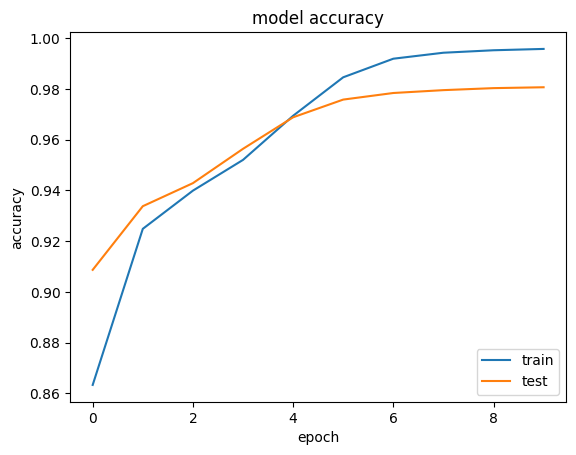

In [204]:
plt.plot(blstm_training.history['acc'])
plt.plot(blstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

Оценка результатов

In [205]:
result_df = pd.DataFrame(columns=['loss', 'accuracy'])

In [206]:

loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)

42/42 [==============================] - 1s 15ms/step - loss: 0.0697 - acc: 0.9775


In [207]:
result_df.loc['RNN'] = [loss, accuracy]

In [208]:
loss, accuracy = lstm_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['LSTM'] = [loss, accuracy]

42/42 [==============================] - 2s 43ms/step - loss: 0.0713 - acc: 0.9768


In [209]:
loss, accuracy = gru_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['GRU'] = [loss, accuracy]

42/42 [==============================] - 2s 38ms/step - loss: 0.0665 - acc: 0.9774


In [210]:
loss, accuracy = blstm_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['BLSTM'] = [loss, accuracy]

42/42 [==============================] - 5s 120ms/step - loss: 0.0572 - acc: 0.9803


In [211]:
result_df.sort_values('accuracy', ascending=False)

,loss,accuracy
BLSTM,0.057178,0.980344
RNN,0.069746,0.977537
GRU,0.066513,0.977365
LSTM,0.071294,0.976774


Как видим, Bidirectional LSTM справляется лучше других и по loss и по accurasy

# NER



In [1]:
!wget -c 'http://www.labinform.ru/pub/named_entities/collection5.zip'

--2023-08-27 10:44:02--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip’

collection5.zip     100%[===================>]   1.81M  2.30MB/s    in 0.8s    

2023-08-27 10:44:03 (2.30 MB/s) - ‘collection5.zip’ saved [1899530/1899530]



In [ ]:
!unzip collection5.zip

In [3]:
import os

In [4]:
files_list = os.listdir('/content/Collection5')

In [5]:
files_list.sort()

In [6]:
files_list[:5]

['001.ann', '001.txt', '002.ann', '002.txt', '003.ann']

In [7]:
len(files_list)

2000

In [9]:
import re

In [10]:
files_list[7].split('.')[-1]

'txt'

In [11]:
document_list = []

In [12]:
for file_name in files_list:
  if file_name.split('.')[-1] == 'txt':
    path = '/content/Collection5/' + file_name
    with open(path, 'r') as f:
      lines = f.readlines()
      document_list.append(lines)

In [13]:
document_list[0]

['Россия рассчитывает на конструктивное воздействие США на Грузию\n',
 '\n',
 '04/08/2008 12:08\n',
 '\n',
 'МОСКВА, 4 авг - РИА Новости. Россия рассчитывает, что США воздействуют на Тбилиси в связи с обострением ситуации в зоне грузино-осетинского конфликта. Об этом статс-секретарь - заместитель министра иностранных дел России Григорий Карасин заявил в телефонном разговоре с заместителем госсекретаря США Дэниэлом Фридом.\n',
 '\n',
 '"С российской стороны выражена глубокая озабоченность в связи с новым витком напряженности вокруг Южной Осетии, противозаконными действиями грузинской стороны по наращиванию своих вооруженных сил в регионе, бесконтрольным строительством фортификационных сооружений", - говорится в сообщении.\n',
 '\n',
 '"Россия уже призвала Тбилиси к ответственной линии и рассчитывает также на конструктивное воздействие со стороны Вашингтона", - сообщил МИД России. ']

In [14]:
str(document_list[0])


'[\'Россия рассчитывает на конструктивное воздействие США на Грузию\\n\', \'\\n\', \'04/08/2008 12:08\\n\', \'\\n\', \'МОСКВА, 4 авг - РИА Новости. Россия рассчитывает, что США воздействуют на Тбилиси в связи с обострением ситуации в зоне грузино-осетинского конфликта. Об этом статс-секретарь - заместитель министра иностранных дел России Григорий Карасин заявил в телефонном разговоре с заместителем госсекретаря США Дэниэлом Фридом.\\n\', \'\\n\', \'"С российской стороны выражена глубокая озабоченность в связи с новым витком напряженности вокруг Южной Осетии, противозаконными действиями грузинской стороны по наращиванию своих вооруженных сил в регионе, бесконтрольным строительством фортификационных сооружений", - говорится в сообщении.\\n\', \'\\n\', \'"Россия уже призвала Тбилиси к ответственной линии и рассчитывает также на конструктивное воздействие со стороны Вашингтона", - сообщил МИД России. \']'

In [15]:
document = ' '.join([str(i) for i in document_list])

In [16]:
document = re.sub(r'[^а-яА-ЯЁё]', ' ', document)

In [17]:
document = ' '.join([word for word in document.split()])

In [18]:
document[:100]

'Россия рассчитывает на конструктивное воздействие США на Грузию МОСКВА авг РИА Новости Россия рассчи'

In [26]:
nltk.pos_tag(nltk.word_tokenize(document), lang='rus')

[('Россия', 'S'),
 ('рассчитывает', 'V'),
 ('на', 'PR'),
 ('конструктивное', 'A=n'),
 ('воздействие', 'S'),
 ('США', 'S'),
 ('на', 'PR'),
 ('Грузию', 'S'),
 ('МОСКВА', 'S'),
 ('авг', 'S'),
 ('РИА', 'S'),
 ('Новости', 'S'),
 ('Россия', 'S'),
 ('рассчитывает', 'V'),
 ('что', 'CONJ'),
 ('США', 'S'),
 ('воздействуют', 'V'),
 ('на', 'PR'),
 ('Тбилиси', 'S'),
 ('в', 'PR'),
 ('связи', 'S'),
 ('с', 'PR'),
 ('обострением', 'S'),
 ('ситуации', 'S'),
 ('в', 'PR'),
 ('зоне', 'S'),
 ('грузино', 'S'),
 ('осетинского', 'A=m'),
 ('конфликта', 'S'),
 ('Об', 'PR'),
 ('этом', 'S-PRO'),
 ('статс', 'S'),
 ('секретарь', 'S'),
 ('заместитель', 'S'),
 ('министра', 'S'),
 ('иностранных', 'A=pl'),
 ('дел', 'S'),
 ('России', 'S'),
 ('Григорий', 'S'),
 ('Карасин', 'S'),
 ('заявил', 'V'),
 ('в', 'PR'),
 ('телефонном', 'A=m'),
 ('разговоре', 'S'),
 ('с', 'PR'),
 ('заместителем', 'S'),
 ('госсекретаря', 'S'),
 ('США', 'S'),
 ('Дэниэлом', 'S'),
 ('Фридом', 'S'),
 ('С', 'PR'),
 ('российской', 'A=f'),
 ('стороны', 'S')

In [37]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


In [33]:
tokens = nltk.word_tokenize(document)
pos_tags = nltk.pos_tag(tokens, lang='rus')
ne_chunks = nltk.ne_chunk(pos_tags)

In [54]:
pos_tags_tags = [pos_tag[-1] for pos_tag in pos_tags]

In [59]:
nltk.FreqDist(pos_tags_tags)

FreqDist({'S': 105882, 'PR': 28223, 'V': 27327, 'CONJ': 9254, 'A=m': 7878, 'A=f': 5674, 'A=pl': 5324, 'S-PRO': 5236, 'ADV': 4639, 'A=n': 3138, ...})

In [60]:
tags = [chunk[-1] for chunk in ne_chunks if chunk[-1] not in pos_tags_tags]
nltk.FreqDist(tags)

FreqDist({})

ne_chunk судя по всему не работет с русским текстом

Spacy

In [62]:
!python -m spacy download ru_core_news_sm

2023-08-27 11:50:54.026637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=3a6447be45256fd5db1a291007bc4de2b5a0d204e8aa2120ab1d1530caedb895
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [63]:
import spacy
from spacy import displacy
nlp = spacy.load("ru_core_news_sm")
import ru_core_news_sm

In [64]:
nlp = ru_core_news_sm.load()

In [106]:
doc = nlp(document[:500])

In [82]:
displacy.render(doc, style="dep", jupyter=True)

In [81]:
displacy.render(doc, style="ent", jupyter=True)

In [97]:
!python -m venv env
!.\env\Scripts\activate.bat
!pip install deeppavlov
!python -m deeppavlov install squad_bert

!python -m deeppavlov install ner_ontonotes_bert

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/env/bin/python3

/bin/bash: line 1: .envScriptsactivate.bat: command not found
2023-08-27 12:27:18.783 WARNING in 'deeppavlov.core.common.file'['file'] at line 39: 

################################################################################
# The model 'ner_ontonotes' has been removed from the DeepPavlov configs.
# The model 'ner_ontonotes_bert' is used instead.
# To disable this message please switch to 'ner_ontonotes_bert'.
# Automatic name resolving will be disabled in the deeppavlov 1.2.0,
# and if you try to use 'ner_ontonotes' you will get an ERROR.
##########################################################

In [102]:
!pip install -q deeppavlov
!python -m deeppavlov install ner_ontonotes_bert

In [104]:
from deeppavlov import build_model

ner_model = build_model('ner_ontonotes_bert', download=True, install=True)

2023-08-27 12:34:07.619 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/v1/ner/ner_ontonotes_bert_torch_crf.tar.gz to /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf.tar.gz
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/v1/ner/ner_ontonotes_bert_torch_crf.tar.gz to /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf.tar.gz
100%|██████████| 1.13G/1.13G [00:36<00:00, 31.5MB/s]
2023-08-27 12:34:44.432 INFO in 'deeppavlov.core.data.utils'['utils'] at line 276: Extracting /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf.tar.gz archive into /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf
INFO:deeppavlov.core.data.utils:Extracting /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf.tar.gz archive into /root/.deeppavlov/models/ner_ontonotes_bert_torch_crf


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [110]:
sentences = [word for word in document[:100].split()]

In [111]:
sentences[:5]

['Россия', 'рассчитывает', 'на', 'конструктивное', 'воздействие']

In [114]:
ner_model(sentences)

[[['Россия'],
  ['рассчитывает'],
  ['на'],
  ['конструктивное'],
  ['воздействие'],
  ['США'],
  ['на'],
  ['Грузию'],
  ['МОСКВА'],
  ['авг'],
  ['РИА'],
  ['Новости'],
  ['Россия'],
  ['рассчи']],
 [['O'],
  ['O'],
  ['O'],
  ['O'],
  ['O'],
  ['B-PERSON'],
  ['O'],
  ['B-PERSON'],
  ['B-PERSON'],
  ['O'],
  ['B-PERSON'],
  ['B-PERSON'],
  ['O'],
  ['B-PERSON']]]

## NN NER

Когда дело доходит до распознавания именованных объектов (NER), не существует однозначно «лучшей» архитектуры нейронной сети (NN), подходящей для всех сценариев. Выбор архитектуры зависит от различных факторов, таких как размер и сложность набора данных, доступные вычислительные ресурсы и конкретные требования поставленной задачи. Однако несколько NN-архитектур доказали свою эффективность для задач NER, и некоторые из них я рассмотрю подробно.

1. Рекуррентные нейронные сети (RNN). RNN являются популярным выбором для NER из-за их способности эффективно обрабатывать последовательные данные. Длинная краткосрочная память (LSTM) и GRU (GRU) — два часто используемых варианта RNN. Эти архитектуры могут собирать контекстную информацию, поддерживая состояние внутренней памяти, что помогает распознавать именованные объекты на основе окружающих слов в предложении.

2. Сверточные нейронные сети (CNN). CNN в основном использовались для задач обработки изображений, но также показали себя многообещающе в NER. В этой архитектуре сверточные слои используются для извлечения локальных функций из входных последовательностей с последующим объединением слоев для уменьшения размерности. Применяя несколько сверточных фильтров, CNN могут захватывать различные уровни контекста и изучать значимые представления для именованных объектов.

3. Архитектуры на основе трансформаторов. В последние годы трансформеры привлекли к себе значительное внимание благодаря своим успехам в задачах обработки естественного языка. Механизм самообслуживания, используемый в преобразователях, позволяет им эффективно улавливать долгосрочные зависимости. Такие модели, как BERT (представления двунаправленного кодировщика из преобразователей) и GPT (генеративный предварительно обученный преобразователь), достигли современной производительности при решении различных задач НЛП, включая NER. Эти модели используют большие предварительно обученные языковые представления для улучшения обобщения и эффективного сбора контекстной информации.

4. Гибридные архитектуры. Некоторые исследователи изучали возможность объединения нескольких архитектур нейронных сетей, чтобы извлечь выгоду из их индивидуальных сильных сторон. Например, гибридная архитектура может включать использование CNN для извлечения локальных признаков и RNN для фиксации последовательных зависимостей. Эти гибридные модели потенциально могут повысить производительность систем NER за счет использования преимуществ различных архитектур.

Важно отметить, что выбор архитектуры сам по себе не гарантирует оптимальных результатов в NER. Другие факторы, такие как предварительная обработка данных, разработка функций, настройка гиперпараметров и стратегии обучения, также играют решающую роль в достижении высокой производительности. Кроме того, наличие помеченных обучающих данных важно для эффективного обучения архитектур нейронных сетей.

В заключение отметим, что не существует универсального ответа на вопрос о лучшей архитектуре нейронной сети для NER. Выбор зависит от различных факторов и должен быть адаптирован к конкретным требованиям поставленной задачи. Исследователи и практики часто экспериментируют с различными архитектурами и методами, чтобы найти наиболее подходящее решение для своей конкретной проблемы NER.

In [116]:
!pip install corus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 1.6 MB/s eta 0:00:00


In [117]:
import corus
from corus import load_ne5


In [225]:
dir = '/content/Collection5'
records = load_ne5(dir)


In [226]:
next(records)

Ne5Markup(
    id='2004',
    text='Госдума заслушает отчет ЦБ и задаст вопросы министру энергетики\r\n\r\nСегодня, 19 июня, Государственная дума РФ заслушает годовой отчет Центрального банка РФ за 2012 год, передает корреспондент ИА REGNUM. Отчет представит глава ЦБ Сергей Игнатьев. Бюджетная политика в 2012 году была направлена на обеспечение условий для устойчивого экономического развития и сохранение макроэкономической стабильности при безусловном исполнении принятых расходных обязательств РФ, отмечает в отчете ЦБ.\r\n\r\nПо отчету федерального казначейства, федеральный бюджет за 2012 год исполнен по доходам в сумме 12855,5 млрд рублей, или на 99,5% к доходам, утвержденным законом "О федеральном бюджете на 2012 год и на плановый период 2013 и 2014 годов". Расходы федерального бюджета в 2012 году составили 12895 млрд рублей, дефицит федерального бюджета за 2012 год снизился и составил 39,4 млрд рублей.\r\n\r\nКроме того, в рамках "правительственного часа" на вопросы депутатов ответи

In [125]:
from razdel import tokenize

In [128]:
import pandas as pd


In [227]:
X = []
Y = []
for ix, rec in enumerate(records):
    words = []
    tags = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append(token.text)
        tags.append(type_ent)
    X.append(words)
    Y.append(tags)

In [229]:
len(X[0]) == len(Y[0])

True

In [230]:
index_list_to_remove = []
for i in range(len(X)):
  for j in range(len(X[i])):
    try:
      if X[i][j] == None:
        index_list_to_remove.append((i, j))
        del X[i][j]
        del Y[i][j]
      elif Y[i][j] == None:
        index_list_to_remove.append((i, j))
        del X[i][j]
        del Y[i][j]
    except IndexError:
      print('.', end=' ')

In [231]:
len(index_list_to_remove)

0

In [232]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))

In [233]:
print(f"Total number of tagged sentences: {len(X)}")
print(f"Vocabulary size: {num_words}")
print(f"Total number of tags: {num_tags}")

Total number of tagged sentences: 999
Vocabulary size: 32794
Total number of tags: 6


In [234]:
# encode X
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)
X_encoded = word_tokenizer.texts_to_sequences(X)

In [235]:
# encode Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [236]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print(sum(different_length))

0


In [237]:
lengths = [len(seq) for seq in X_encoded]
print(f"Length of longest sentence: {max(lengths)}")

Length of longest sentence: 2005


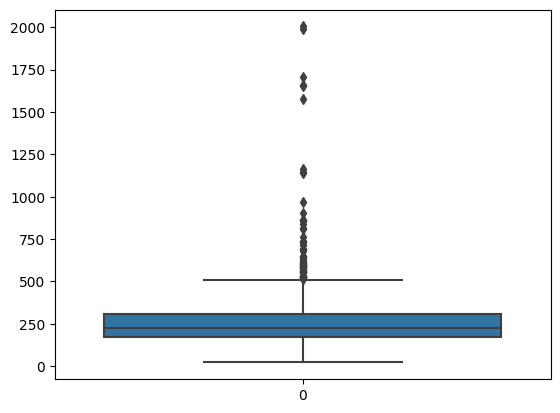

In [238]:
sns.boxplot(lengths)
plt.show()

In [239]:
MAX_SEQ_LENGTH = 500

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [240]:
X, Y = X_padded, Y_padded

In [241]:
sentences = []

for line in tqdm(data['x']):
    spls = preprocess_text(line)
    sentences.append(spls)

  0%|          | 0/8906 [00:00<?, ?it/s]

In [242]:
window = 5
min_count = 7
vector_size = 300
word2vec = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count)

In [243]:
word2vec.build_vocab(sentences)

In [244]:
word2vec.train(sentences, total_examples=word2vec.corpus_count, epochs=30, report_delay=1)

(2557141, 4599750)

In [245]:
EMBEDDING_SIZE  = 300
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

word2id = word_tokenizer.word_index

for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec.wv[word]
    except KeyError:
        pass

In [246]:
embedding_weights.shape

(32795, 300)

In [247]:
Y = to_categorical(Y)
Y.shape

(999, 500, 7)

In [248]:
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)

In [249]:
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [254]:
NUM_CLASSES = Y.shape[2]

In [250]:
for i in [X_train, Y_train, X_test, Y_test, X_validation, Y_validation]:
  print(i.shape)

(721, 500)
(721, 500, 7)
(150, 500)
(150, 500, 7)
(128, 500)
(128, 500, 7)


In [255]:
rnn_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    SimpleRNN(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics = ['acc'])

rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 300)          9838500   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 500, 64)           23360     
                                                                 
 time_distributed_7 (TimeDis  (None, 500, 7)           455       
 tributed)                                                       
                                                                 
Total params: 9,862,315
Trainable params: 9,862,315
Non-trainable params: 0
_________________________________________________________________


In [256]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
6/6 [==============================] - 10s 1s/step - loss: 1.6905 - acc: 0.4768 - val_loss: 1.0654 - val_acc: 0.8422
Epoch 2/10
6/6 [==============================] - 6s 974ms/step - loss: 0.8272 - acc: 0.8856 - val_loss: 0.6001 - val_acc: 0.8951
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 0.5219 - acc: 0.8997 - val_loss: 0.4596 - val_acc: 0.8969
Epoch 4/10
6/6 [==============================] - 6s 979ms/step - loss: 0.4178 - acc: 0.9025 - val_loss: 0.4030 - val_acc: 0.9006
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.3713 - acc: 0.9055 - val_loss: 0.3737 - val_acc: 0.9030
Epoch 6/10
6/6 [==============================] - 5s 892ms/step - loss: 0.3444 - acc: 0.9074 - val_loss: 0.3527 - val_acc: 0.9039
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.3222 - acc: 0.9082 - val_loss: 0.3326 - val_acc: 0.9043
Epoch 8/10
6/6 [==============================] - 8s 1s/step - loss: 0.3019 - acc: 0.9085 - val_loss:

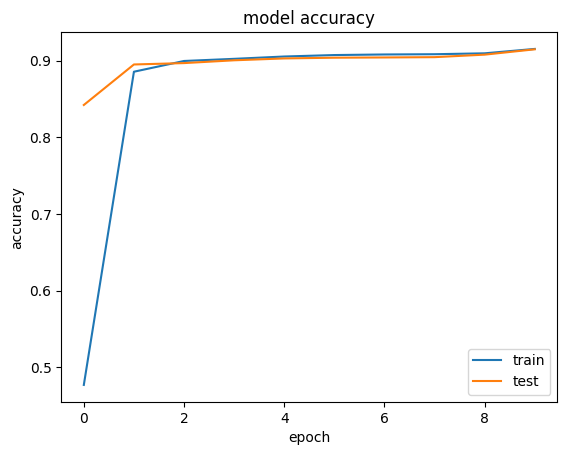

In [257]:
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [258]:
gru_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    GRU(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

gru_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

gru_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 300)          9838500   
                                                                 
 gru_1 (GRU)                 (None, 500, 64)           70272     
                                                                 
 time_distributed_8 (TimeDis  (None, 500, 7)           455       
 tributed)                                                       
                                                                 
Total params: 9,909,227
Trainable params: 9,909,227
Non-trainable params: 0
_________________________________________________________________


In [259]:
gru_training = gru_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
6/6 [==============================] - 16s 2s/step - loss: 1.7979 - acc: 0.7909 - val_loss: 1.5281 - val_acc: 0.9042
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 1.3921 - acc: 0.9092 - val_loss: 1.1133 - val_acc: 0.9053
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 0.9843 - acc: 0.9095 - val_loss: 0.7212 - val_acc: 0.9052
Epoch 4/10
6/6 [==============================] - 12s 2s/step - loss: 0.5913 - acc: 0.9090 - val_loss: 0.4269 - val_acc: 0.9042
Epoch 5/10
6/6 [==============================] - 12s 2s/step - loss: 0.3711 - acc: 0.9075 - val_loss: 0.3551 - val_acc: 0.9027
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.3270 - acc: 0.9059 - val_loss: 0.3398 - val_acc: 0.9017
Epoch 7/10
6/6 [==============================] - 12s 2s/step - loss: 0.3122 - acc: 0.9066 - val_loss: 0.3277 - val_acc: 0.9041
Epoch 8/10
6/6 [==============================] - 12s 2s/step - loss: 0.2933 - acc: 0.9091 - val_loss: 0

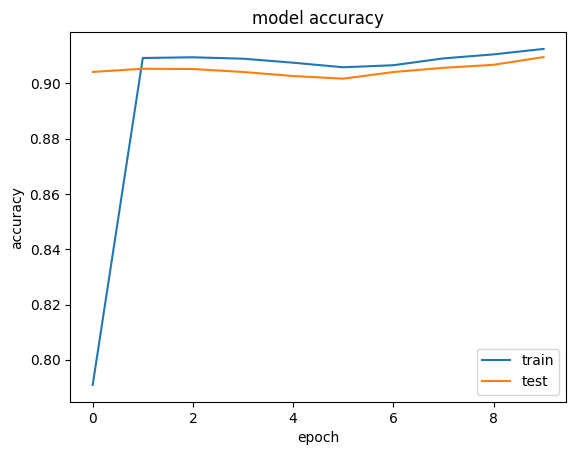

In [260]:
plt.plot(gru_training.history['acc'])
plt.plot(gru_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [261]:
lstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

lstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 300)          9838500   
                                                                 
 lstm_2 (LSTM)               (None, 500, 64)           93440     
                                                                 
 time_distributed_9 (TimeDis  (None, 500, 7)           455       
 tributed)                                                       
                                                                 
Total params: 9,932,395
Trainable params: 9,932,395
Non-trainable params: 0
_________________________________________________________________


In [263]:
lstm_training = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
6/6 [==============================] - 16s 2s/step - loss: 1.7687 - acc: 0.8210 - val_loss: 1.4455 - val_acc: 0.9047
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 1.2922 - acc: 0.9084 - val_loss: 0.9863 - val_acc: 0.9039
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 0.8308 - acc: 0.9058 - val_loss: 0.5526 - val_acc: 0.8972
Epoch 4/10
6/6 [==============================] - 14s 2s/step - loss: 0.4828 - acc: 0.8967 - val_loss: 0.4461 - val_acc: 0.8895
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 0.4152 - acc: 0.8951 - val_loss: 0.4081 - val_acc: 0.8962
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 0.3765 - acc: 0.9030 - val_loss: 0.3790 - val_acc: 0.9020
Epoch 7/10
6/6 [==============================] - 15s 2s/step - loss: 0.3547 - acc: 0.9068 - val_loss: 0.3625 - val_acc: 0.9031
Epoch 8/10
6/6 [==============================] - 14s 2s/step - loss: 0.3397 - acc: 0.9071 - val_loss: 0

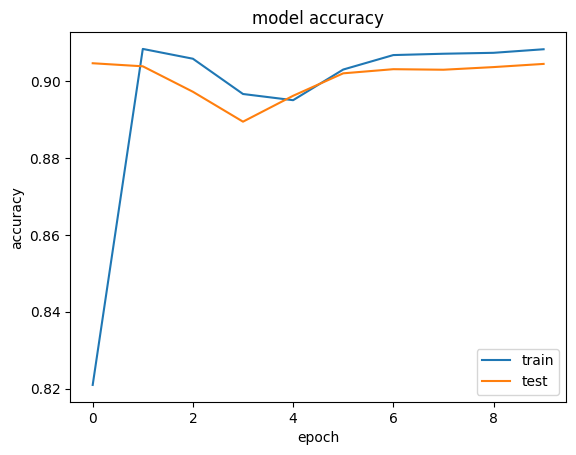

In [264]:
plt.plot(lstm_training.history['acc'])
plt.plot(lstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [265]:
blstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_SIZE, input_length = MAX_SEQ_LENGTH, weights = [embedding_weights], trainable = True),
    Bidirectional(LSTM(64, return_sequences=True)),
    TimeDistributed(Dense(NUM_CLASSES, activation='softmax'))
])

blstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

blstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 500, 300)          9838500   
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 128)         186880    
 nal)                                                            
                                                                 
 time_distributed_10 (TimeDi  (None, 500, 7)           903       
 stributed)                                                      
                                                                 
Total params: 10,026,283
Trainable params: 10,026,283
Non-trainable params: 0
_________________________________________________________________


In [266]:
blstm_training = blstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
6/6 [==============================] - 36s 4s/step - loss: 1.7419 - acc: 0.7915 - val_loss: 1.3519 - val_acc: 0.9020
Epoch 2/10
6/6 [==============================] - 24s 4s/step - loss: 1.2039 - acc: 0.9066 - val_loss: 0.8910 - val_acc: 0.9049
Epoch 3/10
6/6 [==============================] - 27s 4s/step - loss: 0.6887 - acc: 0.9068 - val_loss: 0.4611 - val_acc: 0.8961
Epoch 4/10
6/6 [==============================] - 24s 4s/step - loss: 0.4204 - acc: 0.8947 - val_loss: 0.3971 - val_acc: 0.8914
Epoch 5/10
6/6 [==============================] - 27s 4s/step - loss: 0.3595 - acc: 0.8990 - val_loss: 0.3634 - val_acc: 0.9009
Epoch 6/10
6/6 [==============================] - 23s 4s/step - loss: 0.3371 - acc: 0.9069 - val_loss: 0.3455 - val_acc: 0.9047
Epoch 7/10
6/6 [==============================] - 28s 5s/step - loss: 0.3195 - acc: 0.9094 - val_loss: 0.3324 - val_acc: 0.9059
Epoch 8/10
6/6 [==============================] - 24s 4s/step - loss: 0.3099 - acc: 0.9102 - val_loss: 0

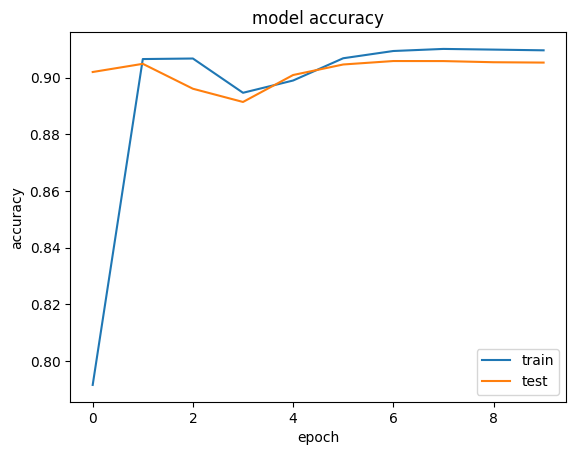

In [267]:
plt.plot(blstm_training.history['acc'])
plt.plot(blstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

Оценка результатов

In [268]:
result_df = pd.DataFrame(columns=['loss', 'accuracy'])

In [269]:

loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['RNN'] = [loss, accuracy]

5/5 [==============================] - 1s 55ms/step - loss: 0.2629 - acc: 0.9204


In [270]:
loss, accuracy = lstm_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['LSTM'] = [loss, accuracy]

5/5 [==============================] - 2s 243ms/step - loss: 0.3109 - acc: 0.9102


In [271]:
loss, accuracy = gru_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['GRU'] = [loss, accuracy]

5/5 [==============================] - 2s 263ms/step - loss: 0.1612 - acc: 0.9538


In [272]:
loss, accuracy = blstm_model.evaluate(X_test, Y_test, verbose = 1)
result_df.loc['BLSTM'] = [loss, accuracy]

5/5 [==============================] - 4s 543ms/step - loss: 0.2831 - acc: 0.9110


In [273]:
result_df.sort_values('accuracy', ascending=False)

,loss,accuracy
GRU,0.161201,0.953787
RNN,0.262870,0.920387
BLSTM,0.283131,0.911040
LSTM,0.310921,0.910240


В этой задаче лучше справляется GRU